In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data.csv', encoding='utf-8')
data

,site,longitude,dimension
0,1,1150,1760
1,2,630,1660
2,3,40,2090
3,4,750,1100
4,5,750,2030
5,6,1030,2070
6,7,1650,650
7,8,1490,1630
8,9,790,2260
9,10,710,1310


In [3]:
data = data.iloc[:, 1:]
data = np.array(data)
data

array([[1150, 1760],
       [ 630, 1660],
       [  40, 2090],
       [ 750, 1100],
       [ 750, 2030],
       [1030, 2070],
       [1650,  650],
       [1490, 1630],
       [ 790, 2260],
       [ 710, 1310],
       [ 840,  550],
       [1170, 2300],
       [ 970, 1340],
       [ 510,  700],
       [ 750,  900],
       [1280, 1200],
       [ 230,  590],
       [ 460,  860],
       [1040,  950],
       [ 590, 1390],
       [ 830, 1770],
       [ 490,  500],
       [1840, 1240],
       [1260, 1500],
       [1280,  790],
       [ 490, 2130],
       [1460, 1420],
       [1260, 1910],
       [ 360, 1980]], dtype=int64)

In [4]:
class DP(object):
    def __init__(self, num_city, data):
        self.num_city = num_city
        self.location = data
        self.dis_mat = self.compute_dis_mat(num_city, data)

    # 计算不同城市之间的距离
    def compute_dis_mat(self, num_city, location):
        dis_mat = np.zeros((num_city, num_city))
        for i in range(num_city):
            for j in range(num_city):
                if i == j:
                    dis_mat[i][j] = np.inf
                    continue
                a = location[i]
                b = location[j]
                tmp = np.sqrt(sum([(x[0] - x[1]) ** 2 for x in zip(a, b)]))
                dis_mat[i][j] = tmp
        return dis_mat

    # 计算路径长度, goback:是否计算回到起始点的路径
    def compute_pathlen(self, path, dis_mat, goback=True):
        a = path[0]
        b = path[-1]
        if goback:
            result = dis_mat[a][b]
        else:
            result = 0.0
        for i in range(len(path) - 1):
            a = path[i]
            b = path[i + 1]
            result += dis_mat[a][b]
        return result

    # 动态规划过程
    def run(self):
        restnum = [x for x in range(1, self.num_city)]
        tmppath = [0]
        tmplen = 0
        cnt = 0
        while len(restnum) > 0:
            cnt += 1
            print(f'第{cnt}次')
            c = restnum[0]
            restnum = restnum[1:]
            # print(restnum)
            if len(tmppath) <= 1:
                tmppath.append(c)
                # print(self.dis_mat)
                tmplen = self.compute_pathlen(tmppath, self.dis_mat)
                print(f'tmppath{tmppath}')
                print(f'tmplen:{tmplen}')
                continue

            insert = 0
            minlen = math.inf
            for i, num in enumerate(tmppath):
                # i-1的距离
                a = tmppath[-1] if i == 0 else tmppath[i - 1]
                # i的距离
                b = tmppath[i]
                tmp1 = self.dis_mat[c][a]
                tmp2 = self.dis_mat[c][b]
                # 回路距离
                curlen = tmplen + tmp1 + tmp2 - self.dis_mat[a][b]
                if curlen < minlen:
                    minlen = curlen
                    insert = i
                    
            tmppath = tmppath[0:insert] + [c] + tmppath[insert:]
            # print(f'insert:{insert}')
            # print(f'n是{c}')
            print(f'tmppath:{tmppath}')
            # print(f'restnum:{restnum}')
            tmplen = minlen
            print(f'minlen:{minlen}')
        # print(tmppath[0])
        # print(tmppath[-1])
        dd = self.dis_mat[tmppath[0]][tmppath[-1]]
        tmplen += dd
        print(tmppath)
        return self.location[tmppath], tmplen


In [5]:
model = DP(num_city=data.shape[0], data=data.copy())
Best_path, Best = model.run()
print('规划的路径长度:{}'.format(Best))
print(Best_path)

第1次
tmppath[0, 1]
tmplen:1059.0561835898982
第2次
tmppath:[2, 0, 1]
minlen:2417.612125669835
第3次
tmppath:[2, 0, 3, 1]
minlen:3232.5481316689297
第4次
tmppath:[2, 4, 0, 3, 1]
minlen:3269.660429305291
第5次
tmppath:[2, 4, 5, 0, 3, 1]
minlen:3402.3214040712573
第6次
tmppath:[2, 4, 5, 0, 6, 3, 1]
minlen:4854.216033477846
第7次
tmppath:[2, 4, 5, 0, 7, 6, 3, 1]
minlen:4993.7815601317125
第8次
tmppath:[2, 4, 8, 5, 0, 7, 6, 3, 1]
minlen:5250.495755555949
第9次
tmppath:[2, 4, 8, 5, 0, 7, 6, 3, 9, 1]
minlen:5250.58495770954
第10次
tmppath:[2, 4, 8, 5, 0, 7, 6, 10, 3, 9, 1]
minlen:5617.818855667973
第11次
tmppath:[2, 4, 8, 11, 5, 0, 7, 6, 10, 3, 9, 1]
minlen:5963.072002215275
第12次
tmppath:[2, 4, 8, 11, 5, 0, 7, 6, 10, 3, 9, 12, 1]
minlen:6332.675288558147
第13次
tmppath:[2, 4, 8, 11, 5, 0, 7, 6, 10, 13, 3, 9, 12, 1]
minlen:6604.327827629898
第14次
tmppath:[2, 4, 8, 11, 5, 0, 7, 6, 10, 13, 14, 3, 9, 12, 1]
minlen:6650.26166307854
第15次
tmppath:[2, 4, 8, 11, 5, 0, 7, 15, 6, 10, 13, 14, 3, 9, 12, 1]
minlen:6798.6983174213

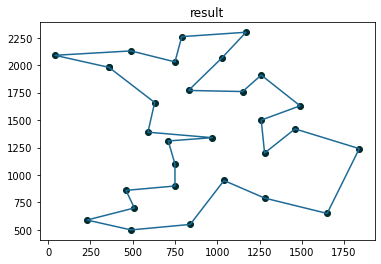

In [7]:
plt.scatter(Best_path[:, 0], Best_path[:, 1], color='#002C2F')
Best_path = np.vstack([Best_path, Best_path[0]])
plt.plot(Best_path[:, 0], Best_path[:, 1], '#1D6A96')
plt.title('result')
plt.savefig('./DP.png', dpi=600)
plt.show()

In [100]:
r = pd.DataFrame(columns=['longitude', 'dimension'], data=Best_path)
b = pd.Series({'Best': Best})
a = pd.concat([r, b], axis=1)
a.to_csv('DP.csv', encoding='utf-8', index=False)